In [45]:
import cv2

from PIL import Image
import pytesseract

# image = Image.open('sb/1.jpg')
# print(type(image))
# text = pytesseract.image_to_string(image)
# print(text)


In [46]:
import cv2
import numpy as np
from img_classify import classify_image 
from PIL import Image
import pytesseract
import matplotlib.pyplot as plt

def rescaleFrame(frame, scale = 1.25):
    height = int(frame.shape[0] * scale)
    width = int(frame.shape[1] * scale)
    dimensions = (width, height)
    return cv2.resize(frame,dimensions,interpolation = cv2.INTER_AREA)

def last_i(edges, i, l, r, n, m):
    if (l < 0 or r >= m):
        return 0
    for k in range(l, r, 1):
        if (edges[i][k] > 0):
            return 0
    return 1

def last_j(edges, j, l, r, n, m):
    if (l < 0 or r >= n):
        return 0
    for k in range(l, r, 1):
        if (edges[k][j] > 0):
            return 0
    return 1


def find_axes(image_path):
    # Load image
    image = cv2.imread(image_path)
    # blur_image = cv2.GaussianBlur(image, (3, 3), 0)
    blur_image = 0
    gray = cv2.cvtColor(image - blur_image, cv2.COLOR_BGR2GRAY)
    #gray = rescaleFrame(gray)

    # Edge detection
    n, m = gray.shape
    edges = cv2.Canny(gray, 40, 40)
    print((n, m))
    print(edges[100:120, 100:120])
    cv2.imshow("FUCK", rescaleFrame(edges, 1.5))

    lines = list()
    Threshold = m // 3
    gap = 10
    cont = 8
    segments = 3
    for i in range(n - 1, 0, -1):
        cnt_tot = 0
        max_tot = 0

        cnt_cont = 0
        num_cont = 0
        for j in range(m):
            if (last_i(edges, i, j - gap, j, n, m)):
                if cnt_tot > max_tot:
                    max = cnt
                cnt_tot = 0
            else:
                if (edges[i][j] > 0):
                    cnt_tot += 1
                    if cnt_tot > max_tot:
                        max_tot = cnt_tot

            if (edges[i][j] == 0):
                cnt_cont = 0
            else:
                cnt_cont += 1
                if (cnt_cont % cont == 0):
                    num_cont += 1
        if (max_tot > Threshold and num_cont >= segments):
            # print(i)
            # print(max)
            lines.append((i, 0))
            break
    
    Threshold = n // 3
    gap = 10
    cont = 8
    segments = 3
    for j in range(m):
        cnt_tot = 0
        max_tot = 0

        cnt_cont = 0
        num_cont = 0
        for i in range(n):
            if (last_j(edges, j, i - gap, i, n, m)):
                if cnt_tot > max_tot:
                    max = cnt
                cnt_tot = 0
            else:
                if (edges[i][j] > 0):
                    cnt_tot += 1
                    if cnt_tot > max_tot:
                        max_tot = cnt_tot

            if (edges[i][j] == 0):
                cnt_cont = 0
            else:
                cnt_cont += 1
                if (cnt_cont % cont == 0):
                    num_cont += 1
        if (max_tot > Threshold and num_cont >= segments):
            # print(i)
            # print(max)
            lines.append((j, 1))
            break

    print("FUCKFUCK")
    ans = 0
    for i in range(n):
        if edges[i][19] > 0:
            ans += 1
    print(ans)


    # Hough Line Transform
    # lines = cv2.HoughLines(edges, 1, np.pi / 180, 100)
    
    # If no lines are detected, return None
    # if lines is None:
    #     return None

    x_axis = None
    y_axis = None

    # for line in lines:
    #     rho, theta = line[0]
    #     a = np.cos(theta)
    #     b = np.sin(theta)
    #     x0 = a * rho
    #     y0 = b * rho

    #     # Depending on theta value, determine if it's closer to vertical or horizontal
    #     if theta < np.pi / 4 or theta > 3 * np.pi / 4:
    #         # Vertical line, potentially y-axis
    #         y_axis = (x0, y0)
    #     else:
    #         # Horizontal line, potentially x-axis
    #         x_axis = (x0, y0)

    #     # For demonstration, drawing the detected lines
    #     x1 = int(x0 + 1000 * (-b))
    #     y1 = int(y0 + 1000 * (a))
    #     x2 = int(x0 - 1000 * (-b))
    #     y2 = int(y0 - 1000 * (a))
    #     cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)

    for line in lines:
        # rho, theta = line[0]
        # a = np.cos(theta)
        # b = np.sin(theta)
        # x0 = a * rho
        # y0 = b * rho

        # # Depending on theta value, determine if it's closer to vertical or horizontal
        # if theta < np.pi / 4 or theta > 3 * np.pi / 4:
        #     # Vertical line, potentially y-axis
        #     y_axis = (x0, y0)
        # else:
        #     # Horizontal line, potentially x-axis
        #     x_axis = (x0, y0)

        # # For demonstration, drawing the detected lines
        # x1 = int(x0 + 1000 * (-b))
        # y1 = int(y0 + 1000 * (a))
        # x2 = int(x0 - 1000 * (-b))
        # y2 = int(y0 - 1000 * (a))

        a = line[0]
        if (line[1] == 1):
            x1 = a
            x2 = a
            y1 = 0
            y2 = n - 1
            # print(x1, y1, x2, y2)
        else:
            y1 = a
            y2 = a
            x1 = 0
            x2 = m - 1
        cv2.line(image, (x1, y1), (x2, y2), (0, 0, 255), 2)
        # cv2.line(edges, (x1, y1), (x2, y2), (0, 0, 255), 2)

    # Show the resulting image with detected lines
    # cv2.imshow("Detected Axes", image)
    # cv2.waitKey(0)
    # cv2.destroyAllWindows()

    x_axis = lines[0][0]
    y_axis = lines[1][0]

    return x_axis, y_axis

# x_axis, y_axis = find_axes(image_path)
# print(x_axis, y_axis)


In [80]:
import easyocr

# Initialize the reader using the language model (e.g., 'en' for English)
reader = easyocr.Reader(['en'])

def get_annotations(file_path):
    ans = list()
    with open(file_path, "r") as file:
        for line in file:
            # Use the split method to separate the string by spaces
            str_list = line.split()
            listt = np.zeros(5)
            for i in range(5):
                listt[i] = np.float64(str_list[i])
            ans.append(listt)
    return np.array(ans)


def read(image, annotation):
    image_p = image[int(annotation[2] - annotation[4] / 2) : int(annotation[2] + annotation[4] / 2) + 1, int(annotation[1] - annotation[3] / 2) : int(annotation[1] + annotation[3] / 2) + 1]

    plt.imshow(image_p)
    # Read text from an image
    results = reader.readtext(image_p)
    # Iterate through the results
    for (bbox, text, prob) in results:
        print(f'Text: {text}, Probability: {prob}')
    if len(results) == 0:
        return None
    else:
        return results[0][1]

    # image_p = Image.fromarray(image_p)
    # plt.imshow(image_p)
    # text = pytesseract.image_to_string(image_p, config='--psm 6')
    # return text
    
def generate_discrete(image_path, file_path, dir):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    annotations = get_annotations(file_path)
    n = annotations.shape[0]
    for i in range(n): 
        annotations[i, 1] *= w
        annotations[i, 3] *= w
        annotations[i, 2] *= h
        annotations[i, 4] *= h
    start = -1
    ans = {}
    for i in range(n - 1):
        if (annotations[i, 0] == 1 and annotations[i - 1, 0] != 1):
            start_y = i
        if (annotations[i, 0] == 2 and annotations[i - 1, 0] != 2):
            end_y = i - 1
            v_start_y = np.float64(read(image, annotations[start_y]))
            v_end_y = np.float64(read(image, annotations[end_y]))
            print(v_start_y)
            print(v_end_y)
            unit_length = (v_end_y - v_start_y) / (annotations[end_y, dir] - annotations[start_y, dir])
            start = i
        if start != -1:
            print(i)
            x_label = read(image, annotations[i - start])
            if x_label == None:
                x_label = i - start
            # x_label = i - start
            y_label = v_start_y + (annotations[i, dir] - annotations[start_y, dir]) * unit_length
            ans.update({x_label: y_label})
    print(annotations)
    print(ans)
    return ans


In [82]:
def generate_continuous(image_path, file_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    annotations = get_annotations(file_path)
    n = annotations.shape[0]
    for i in range(n): 
        annotations[i, 1] *= w
        annotations[i, 3] *= w
        annotations[i, 2] *= h
        annotations[i, 4] *= h
    start = -1
    start_x = 0
    ans = {}
    for i in range(n - 1):
        if (annotations[i, 0] == 1 and annotations[i - 1, 0] != 1):
            end_x = i - 1

            v_start_x = np.float64(read(image, annotations[start_x]))
            v_end_x = np.float64(read(image, annotations[end_x]))
            print(v_start_x)
            print(v_end_x)
            unit_length_x = (v_end_x - v_start_x) / (annotations[end_x, 1] - annotations[start_x, 1])

            start_y = i

        if (annotations[i, 0] == 2 and annotations[i - 1, 0] != 2):
            end_y = i - 1

            v_start_y = np.float64(read(image, annotations[start_y]))
            v_end_y = np.float64(read(image, annotations[end_y]))

            print(v_start_y)
            print(v_end_y)
            unit_length_y = (v_end_y - v_start_y) / (annotations[end_y, 2] - annotations[start_y, 2])

            start = i

        if start != -1:
            # x_label = read(image, annotations[i - start])
            x_label = v_start_x + (annotations[i, 1] - annotations[start_x, 1]) * unit_length_x
            y_label = v_start_y + (annotations[i, 2] - annotations[start_y, 2]) * unit_length_y
            ans.update({x_label: y_label})
    print(annotations)
    print(ans)
    return ans

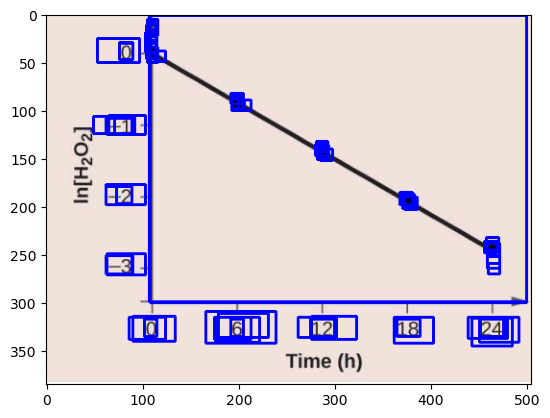

In [88]:
# file_path = "sb/annotations/6.txt"

def generate(image_path):
    ans = {}
    match classify_image(image_path):
        case "line":
            ans = generate_discrete(image_path, file_path, 2)
        case "dot":
            ans = generate_discrete(image_path, file_path, 2)
        case "vertical_bar":
            ans = generate_discrete(image_path, file_path, 2)
        case "horinzontal_bar":
            ans = generate_discrete(image_path, file_path, 1)
        case "scatter":
            ans = generate_continuous(image_path, file_path)
            
    return ans


def draw(image_path, file_path):
    image = cv2.imread(image_path)
    h, w = image.shape[:2]
    annotations = get_annotations(file_path)
    n = annotations.shape[0]
    for i in range(n): 
        annotations[i, 1] *= w
        annotations[i, 3] *= w
        annotations[i, 2] *= h
        annotations[i, 4] *= h
    for i in range(n):
        cv2.rectangle(image, (int(annotations[i, 1] - annotations[i, 3] / 2), int(annotations[i, 2] - annotations[i, 4] / 2)), (int(annotations[i, 1] + annotations[i, 3] / 2), int(annotations[i, 2] + annotations[i, 4] / 2)), (0, 0, 255), thickness = 2)
    plt.imshow(image)
    

image_path = "sb/test/images/1.jpg"
file_path = "sb/test/annotations/1.txt"

draw(image_path, file_path)


# generate(image_path)

In [102]:
import torch
import math
import matplotlib
from pathlib import Path
import random

def color_list():
    # Return first 10 plt colors as (r,g,b) https://stackoverflow.com/questions/51350872/python-from-color-name-to-rgb
    def hex2rgb(h):
        return tuple(int(h[1 + i:1 + i + 2], 16) for i in (0, 2, 4))

    return [hex2rgb(h) for h in matplotlib.colors.TABLEAU_COLORS.values()]

def xywh2xyxy(x):
    # Convert nx4 boxes from [x, y, w, h] to [x1, y1, x2, y2] where xy1=top-left, xy2=bottom-right
    y = x.clone() if isinstance(x, torch.Tensor) else np.copy(x)
    y[:, 0] = x[:, 0] - x[:, 2] / 2  # top left x
    y[:, 1] = x[:, 1] - x[:, 3] / 2  # top left y
    y[:, 2] = x[:, 0] + x[:, 2] / 2  # bottom right x
    y[:, 3] = x[:, 1] + x[:, 3] / 2  # bottom right y
    return y

def plot_one_box(x, img, color=None, label=None, line_thickness=3):
    # Plots one bounding box on image img
    tl = line_thickness or round(0.002 * (img.shape[0] + img.shape[1]) / 2) + 1  # line/font thickness
    color = color or [random.randint(0, 255) for _ in range(3)]
    c1, c2 = (int(x[0]), int(x[1])), (int(x[2]), int(x[3]))
    cv2.rectangle(img, c1, c2, color, thickness=tl, lineType=cv2.LINE_AA)
    if label:
        tf = max(tl - 1, 1)  # font thickness
        t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
        c2 = c1[0] + t_size[0], c1[1] - t_size[1] - 3
        cv2.rectangle(img, c1, c2, color, -1, cv2.LINE_AA)  # filled
        cv2.putText(img, label, (c1[0], c1[1] - 2), 0, tl / 3, [225, 255, 255], thickness=tf, lineType=cv2.LINE_AA)

def plot_images(images, targets, paths=None, fname='images.jpg', names=None, max_size=640, max_subplots=16):
    # Plot image grid with labels

    if isinstance(images, torch.Tensor):
        images = images.cpu().float().numpy()
    if isinstance(targets, torch.Tensor):
        targets = targets.cpu().numpy()

    # un-normalise
    if np.max(images[0]) <= 1:
        images *= 255

    tl = 3  # line thickness
    tf = max(tl - 1, 1)  # font thickness
    bs, _, h, w = images.shape  # batch size, _, height, width
    bs = min(bs, max_subplots)  # limit plot images
    ns = np.ceil(bs ** 0.5)  # number of subplots (square)

    # Check if we should resize
    scale_factor = max_size / max(h, w)
    if scale_factor < 1:
        h = math.ceil(scale_factor * h)
        w = math.ceil(scale_factor * w)

    colors = color_list()  # list of colors
    mosaic = np.full((int(ns * h), int(ns * w), 3), 255, dtype=np.uint8)  # init
    for i, img in enumerate(images):
        if i == max_subplots:  # if last batch has fewer images than we expect
            break

        block_x = int(w * (i // ns))
        block_y = int(h * (i % ns))

        img = img.transpose(1, 2, 0)
        if scale_factor < 1:
            img = cv2.resize(img, (w, h))

        mosaic[block_y:block_y + h, block_x:block_x + w, :] = img
        if len(targets) > 0:
            image_targets = targets[targets[:, 0] == i]
            boxes = xywh2xyxy(image_targets[:, 2:6]).T
            classes = image_targets[:, 1].astype('int')
            labels = image_targets.shape[1] == 6  # labels if no conf column
            conf = None if labels else image_targets[:, 6]  # check for confidence presence (label vs pred)

            if boxes.shape[1]:
                if boxes.max() <= 1.01:  # if normalized with tolerance 0.01
                    boxes[[0, 2]] *= w  # scale to pixels
                    boxes[[1, 3]] *= h
                elif scale_factor < 1:  # absolute coords need scale if image scales
                    boxes *= scale_factor
            boxes[[0, 2]] += block_x
            boxes[[1, 3]] += block_y
            for j, box in enumerate(boxes.T):
                cls = int(classes[j])
                color = colors[cls % len(colors)]
                cls = names[cls] if names else cls
                if labels or conf[j] > 0.25:  # 0.25 conf thresh
                    label = '%s' % cls if labels else '%s %.1f' % (cls, conf[j])
                    plot_one_box(box, mosaic, label=label, color=color, line_thickness=tl)

        # Draw image filename labels
        if paths:
            label = Path(paths[i]).name[:40]  # trim to 40 char
            t_size = cv2.getTextSize(label, 0, fontScale=tl / 3, thickness=tf)[0]
            cv2.putText(mosaic, label, (block_x + 5, block_y + t_size[1] + 5), 0, tl / 3, [220, 220, 220], thickness=tf,
                        lineType=cv2.LINE_AA)

        # Image border
        cv2.rectangle(mosaic, (block_x, block_y), (block_x + w, block_y + h), (255, 255, 255), thickness=3)

    if fname:
        r = min(1280. / max(h, w) / ns, 1.0)  # ratio to limit image size
        mosaic = cv2.resize(mosaic, (int(ns * w * r), int(ns * h * r)), interpolation=cv2.INTER_AREA)
        # cv2.imwrite(fname, cv2.cvtColor(mosaic, cv2.COLOR_BGR2RGB))  # cv2 save
        Image.fromarray(mosaic).save(fname)  # PIL save
    return mosaic


In [99]:
image = cv2.imread("sb/test/images/1.jpg")
annotations = get_annotations(file_path)

In [100]:
num_rows, num_cols = annotations.shape

# Define the column of zeros you want to ad
new_column = np.zeros((num_rows, 1))
new_column_right = np.ones((num_rows, 1))

# Concatenate the new column to the original array
result_array = np.concatenate((new_column, annotations), axis=1)
result_array = np.concatenate((result_array, new_column_right), axis=1)

In [106]:
image.shape

(385, 505, 3)

In [109]:
res = plot_images(np.array(image), result_array)

ValueError: could not broadcast input array from shape (505,3,385) into shape (505,3,3)